# Conectar Mysql con Python usando MySQL¶


In [1]:
import mysql.connector
import pandas as pd
import scipy as sp
import matplotlib as mtpl

# Conectar

In [2]:
mydb = mysql.connector.connect(user="root",password="perrito",host="localhost",db="hospital_prueba1")

mycursor = mydb.cursor()

# cursor

In [3]:
mycursor.execute('SELECT *  FROM diab')

In [4]:
rows = mycursor.fetchall() #todos los resultados

In [5]:
singlerow = mycursor.fetchone() #resultados uno a la vez

# DataFrame (tupla de tuplas)

In [24]:
df = pd.DataFrame( [[ij for ij in i] for i in rows] )

In [25]:
df

,0,1,2,3,4,5
0,Andres,Torres,54,M,SI,SI
1,Daniela,Ruiz,10,F,NO,NO
2,Erick,Ocho,32,M,SI,SI
3,Hernan,Diaz,43,M,NO,NO
4,Omar,Santos,39,M,SI,NO
5,Paola,Lopez,21,F,NO,NO
6,Patricia,Jimenez,12,F,SI,NO
7,Sandra,Rivera,34,F,NO,SI
8,Vanessa,Sanchez,28,F,NO,SI


In [26]:
df2=df.rename(columns = {0:'Nombre',1:'Apellidos',2:'Edad',3:'Edad',4:'Sexo',5:'Diabetes',6:'Hipertension'})

In [27]:
df2

,Nombre,Apellidos,Edad,Edad,Sexo,Diabetes
0,Andres,Torres,54,M,SI,SI
1,Daniela,Ruiz,10,F,NO,NO
2,Erick,Ocho,32,M,SI,SI
3,Hernan,Diaz,43,M,NO,NO
4,Omar,Santos,39,M,SI,NO
5,Paola,Lopez,21,F,NO,NO
6,Patricia,Jimenez,12,F,SI,NO
7,Sandra,Rivera,34,F,NO,SI
8,Vanessa,Sanchez,28,F,NO,SI


In [28]:
df[0]  #deslpliega la primera column

0      Andres
1     Daniela
2       Erick
3      Hernan
4        Omar
5       Paola
6    Patricia
7      Sandra
8     Vanessa
Name: 0, dtype: object

In [29]:
df[0:2]  #despliega filas

,0,1,2,3,4,5
0,Andres,Torres,54,M,SI,SI
1,Daniela,Ruiz,10,F,NO,NO


In [30]:
df.loc[1:2,[1]] #selecciona cierta seccion tanto en filas com en columnas

,1
1,Ruiz
2,Ocho


In [31]:
df[df[2]=='ROA']  #filtro

,0,1,2,3,4,5


In [32]:
df.dropna()  #elimina los que no tengan valores

,0,1,2,3,4,5
0,Andres,Torres,54,M,SI,SI
1,Daniela,Ruiz,10,F,NO,NO
2,Erick,Ocho,32,M,SI,SI
3,Hernan,Diaz,43,M,NO,NO
4,Omar,Santos,39,M,SI,NO
5,Paola,Lopez,21,F,NO,NO
6,Patricia,Jimenez,12,F,SI,NO
7,Sandra,Rivera,34,F,NO,SI
8,Vanessa,Sanchez,28,F,NO,SI


In [33]:
print (df.shape)

(9, 6)


In [34]:
df.describe()

,0,1,2,3,4,5
count,9,9,9,9,9,9
unique,9,9,9,2,2,2
top,Erick,Ruiz,28,F,NO,NO
freq,1,1,1,5,5,5


In [35]:
import pandas as pd

In [36]:
pd.crosstab(df[3],df[4])

4,NO,SI
3,,
F,4,1
M,1,3


In [37]:
graf= pd.crosstab(df[3],df[4])

In [38]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'SEXO VS DIABETES')

<Figure size 2160x720 with 0 Axes>

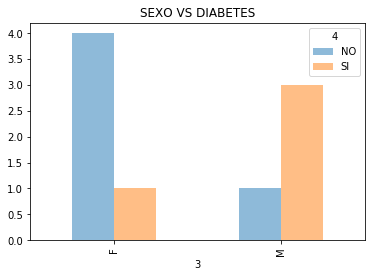

In [39]:
fig = plt.figure(figsize=(30,10)) #Figura de 30x10 pixeles
graf.plot(kind='bar', alpha=0.5)
plt.title('SEXO VS DIABETES')

In [40]:
Masdatos = df.copy()
Masdatos["HIJOS"] = [1, 0, 1, 0, 2, 0, 3, 4, 1]
Masdatos

,0,1,2,3,4,5,HIJOS
0,Andres,Torres,54,M,SI,SI,1
1,Daniela,Ruiz,10,F,NO,NO,0
2,Erick,Ocho,32,M,SI,SI,1
3,Hernan,Diaz,43,M,NO,NO,0
4,Omar,Santos,39,M,SI,NO,2
5,Paola,Lopez,21,F,NO,NO,0
6,Patricia,Jimenez,12,F,SI,NO,3
7,Sandra,Rivera,34,F,NO,SI,4
8,Vanessa,Sanchez,28,F,NO,SI,1
